<a href="https://colab.research.google.com/github/quiquegtz27/python-ml-course/blob/Collab---v-3.8/notebooks/T2%20-%202%20-%20Data%20Cleaning%20-%20Funciones%20de%20distribuci%C3%B3n%20de%20probabilidad%20-%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de distribución de probabilidades
## Distribución Uniforme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
a = 1
b = 100
n = 1000000
#Generación de números aleatorios que cumplan con una distribución uniforme
data = np.random.uniform(a, b, n) # (Limite inferior, Limite superior, Número de muestras)

(array([ 99994., 100157., 100342.,  99898.,  99798.,  99396.,  99929.,
        100606.,  99705., 100175.]),
 array([ 1.00012488, 10.90010377, 20.80008266, 30.70006154, 40.60004043,
        50.50001931, 60.3999982 , 70.29997709, 80.19995597, 90.09993486,
        99.99991374]),
 <a list of 10 Patch objects>)

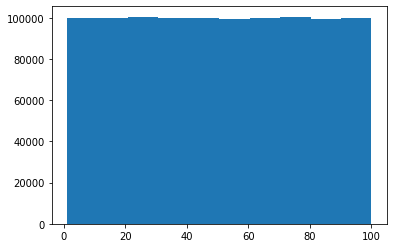

In [21]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [49]:
#Generación de un set de números aleatorios que cumplen con una distriución normal
data = np.random.randn(100000)

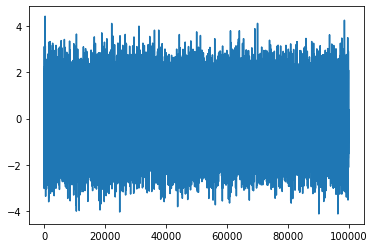

In [50]:
#Imprimir en sucesión todos los valores contra un eje x creado para ver que todos son diferentes
x = range(1,100001)
plt.plot(x, data)

(array([9.0000e+00, 4.0000e+01, 1.9000e+02, 5.5400e+02, 1.5540e+03,
        3.5670e+03, 6.8890e+03, 1.1214e+04, 1.5104e+04, 1.7028e+04,
        1.5791e+04, 1.2400e+04, 8.0270e+03, 4.5270e+03, 2.0070e+03,
        7.7500e+02, 2.4400e+02, 6.2000e+01, 1.4000e+01, 4.0000e+00]),
 array([-4.12588577, -3.69813102, -3.27037626, -2.84262151, -2.41486676,
        -1.987112  , -1.55935725, -1.13160249, -0.70384774, -0.27609299,
         0.15166177,  0.57941652,  1.00717127,  1.43492603,  1.86268078,
         2.29043554,  2.71819029,  3.14594504,  3.5736998 ,  4.00145455,
         4.42920931]),
 <a list of 20 Patch objects>)

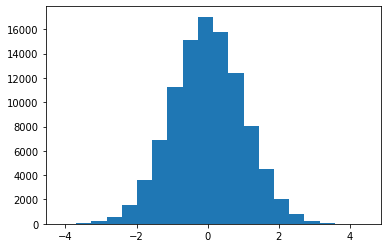

In [52]:
%matplotlib inline
#Histograma de los valores, en donde se puede ver que se dibuja la camapana de Gauss
plt.hist(data, 20)

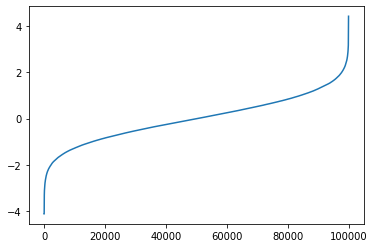

In [53]:
#Dibujando la función de distribución acumulada.
plt.plot(x,sorted(data))

####Tipificando para encontrar una normalizar una distribución con Propia media y propia desviación estándar, siguiendo el teorema central del límite:
$$Z = \frac{(X-\mu)}{σ} → N(0,1) $$
####Despejando para X
$$X = μ + σZ$$

(array([  10.,  131.,  678., 1912., 3014., 2652., 1209.,  319.,   67.,
           8.]),
 array([-3.89166878, -1.92981538,  0.03203802,  1.99389142,  3.95574482,
         5.91759821,  7.87945161,  9.84130501, 11.80315841, 13.76501181,
        15.72686521]),
 <a list of 10 Patch objects>)

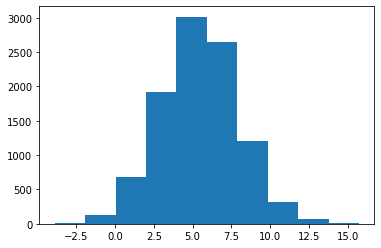

In [58]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [63]:
#Para conseguir más de una muestra con randn
data = np.random.randn(2,4)
data

array([[-1.4700105 , -0.54639732,  0.79673429,  1.46151614],
       [-1.08773032,  0.51165757,  0.22659485, -1.28015141]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [ ]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.143076000000002


(3.143076000000002, [<matplotlib.lines.Line2D at 0x7f85134a1ac8>])

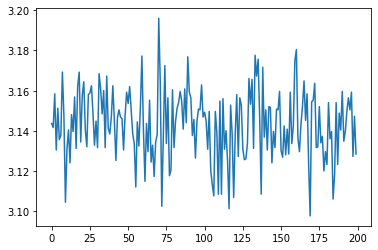

In [ ]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [ ]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [ ]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.002164,1.499644,18.508191
std,0.999902,2.501756,7.794876
min,-4.614127,-11.344276,5.000005
25%,-0.673665,-0.187840,11.749997
50%,0.002129,1.502898,18.506363
75%,0.678266,3.187172,25.261393
max,4.553337,13.301662,31.999969


(array([1.22000e+02, 2.50800e+03, 2.81180e+04, 1.40963e+05, 3.15165e+05,
        3.24594e+05, 1.52739e+05, 3.25730e+04, 3.09000e+03, 1.28000e+02]),
 array([-4.61412738, -3.69738095, -2.78063452, -1.86388809, -0.94714166,
        -0.03039522,  0.88635121,  1.80309764,  2.71984407,  3.6365905 ,
         4.55333693]),
 <a list of 10 Patch objects>)

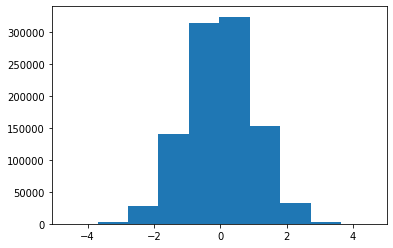

In [ ]:
plt.hist(data["A"])

(array([1.20000e+01, 8.29000e+02, 1.39770e+04, 1.01506e+05, 3.00478e+05,
        3.64624e+05, 1.79885e+05, 3.57100e+04, 2.90300e+03, 7.60000e+01]),
 array([-11.34427637,  -8.87968257,  -6.41508878,  -3.95049498,
         -1.48590119,   0.9786926 ,   3.4432864 ,   5.90788019,
          8.37247399,  10.83706778,  13.30166157]),
 <a list of 10 Patch objects>)

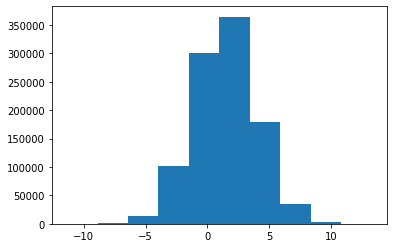

In [ ]:
plt.hist(data["B"])

(array([ 99574., 100661.,  99456.,  99788., 100310.,  99741.,  99869.,
        100111., 100293., 100197.]),
 array([ 5.00000455,  7.70000101, 10.39999746, 13.09999392, 15.79999037,
        18.49998682, 21.19998328, 23.89997973, 26.59997619, 29.29997264,
        31.99996909]),
 <a list of 10 Patch objects>)

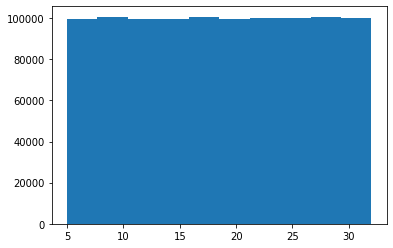

In [ ]:
plt.hist(data["C"])

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Curso Machine Learning con Python/datasets/customer-churn-model/Customer Churn Model.txt")

In [ ]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
colum_names = data.columns.values.tolist()

In [ ]:
a = len(colum_names)
a

21

In [ ]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [ ]:
new_data

,Column Name,A,B
42,State,0.009601,0.571675
43,Account Length,1.127091,0.203394
44,Area Code,1.413309,0.426407
45,Phone,1.335081,0.190180
46,Int'l Plan,-0.828382,0.156801
47,VMail Plan,0.608314,0.255236
48,VMail Message,-1.529998,0.688072
49,Day Mins,0.463638,0.638551
50,Day Calls,-0.419050,0.900912
51,Day Charge,0.180764,0.204704
